In [1]:
import itertools
import numpy as np
from sklearn.datasets import make_circles, load_iris
from mlxtend.plotting import plot_decision_regions, plot_linear_regression
import seaborn.apionly as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams['figure.figsize'] = (14, 10)
sns.set()

C:\Users\Rafael\Documents\python\current\python-3.6.6.amd64\lib\site-packages\seaborn\apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [6]:
%%!
pip install mlxtend

['Requirement already satisfied: mlxtend in c:\\users\\rafael\\documents\\python\\current\\python-3.6.6.amd64\\lib\\site-packages (0.13.0)',
 'Requirement already satisfied: scikit-learn>=0.18 in c:\\users\\rafael\\documents\\python\\current\\python-3.6.6.amd64\\lib\\site-packages (from mlxtend) (0.19.2)',
 'Requirement already satisfied: numpy>=1.10.4 in c:\\users\\rafael\\documents\\python\\current\\python-3.6.6.amd64\\lib\\site-packages (from mlxtend) (1.14.5+mkl)',
 'Requirement already satisfied: scipy>=0.17 in c:\\users\\rafael\\documents\\python\\current\\python-3.6.6.amd64\\lib\\site-packages (from mlxtend) (1.1.0)',
 'Requirement already satisfied: pandas>=0.17.1 in c:\\users\\rafael\\documents\\python\\current\\python-3.6.6.amd64\\lib\\site-packages (from mlxtend) (0.23.4)',
 'Requirement already satisfied: setuptools in c:\\users\\rafael\\documents\\python\\current\\python-3.6.6.amd64\\lib\\site-packages (from mlxtend) (40.2.0)',
 'Requirement already satisfied: matplotlib>=

In [2]:
rng = np.random.RandomState(0)
iris = load_iris()
X_circle, y_cicle = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
X_regres = 100 * rng.rand(100, 1) + 10
X_xor = rng.randn(300, 2)

In [4]:
data = {
    "regresión": {
        "X": X_regres,
        "y": 200 + 1500 * X_regres[:, 0] + rng.rand(X_regres.shape[0]) * 50000
    },
    "regresión2": {
        "X": X_regres,
        "y": 200 + X_regres[:, 0] ** 4 + rng.rand(X_regres.shape[0]) * 50000000
    },
    "iris": {
        "X": iris.data[:, [0, 2]],
        "y": iris.target
    },
    "xor": {
        "X": X_xor,
        "y": np.array(np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0), dtype=int)
    },
    "circulo": {
        "X": X_circle,
        "y": y_cicle
    }   
}

# Regresión Lineal

### Tarea: sólo regresión

### Modelo: $$\hat{y} = \sum_{i=0}^p{\theta_i . x_i}$$

### Costo: $$\sum_{i=0}^n{(\hat{y_i} - y_i)^2} $$


(26725.199173779343, 1473.9769647857117, 0.9495273638177086)

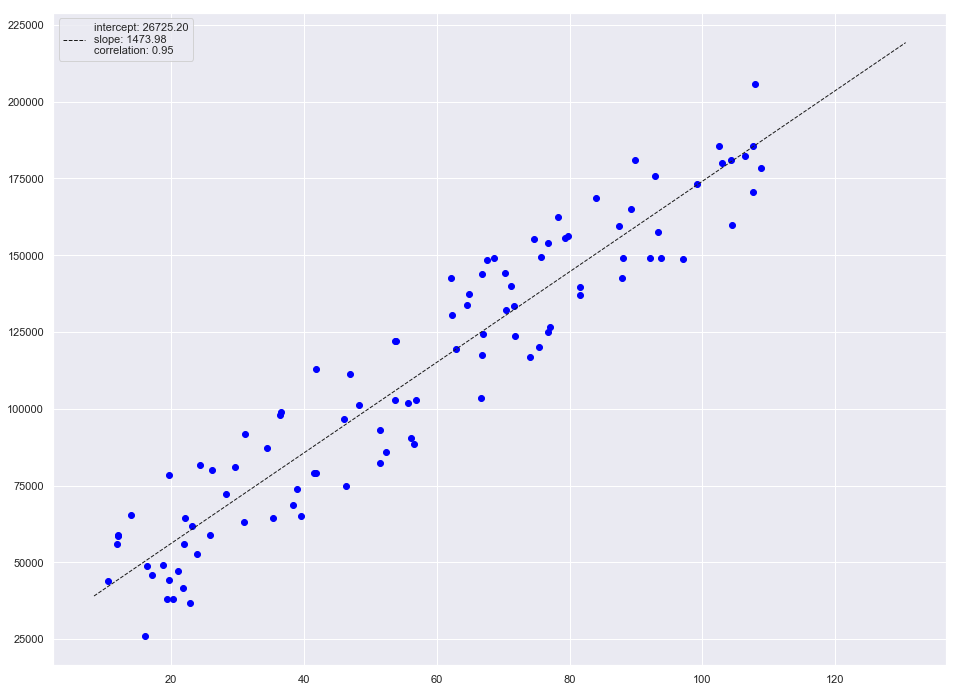

In [5]:
from sklearn.linear_model import LinearRegression
plt.rcParams['figure.figsize'] = (16, 12)

model = LinearRegression()
model.fit(data["regresión"]["X"], data["regresión"]["y"])
plot_linear_regression(data["regresión"]["X"], data["regresión"]["y"])

(-14816472.597258426, 1176859.385667095, 0.8376373807151877)

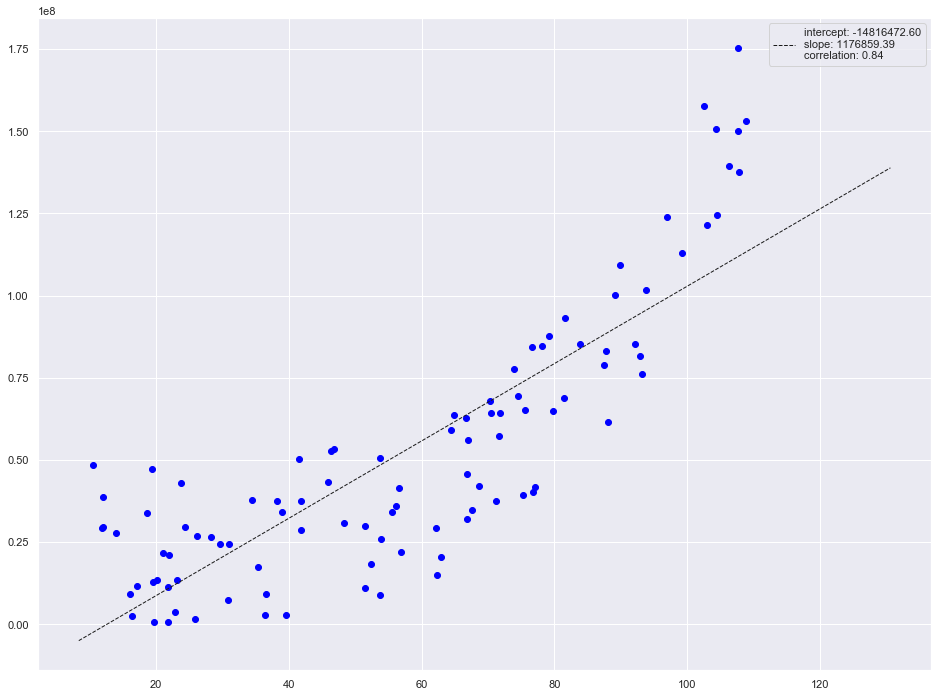

In [13]:
model = LinearRegression()
model.fit(data["regresión2"]["X"], data["regresión2"]["y"])
plot_linear_regression(data["regresión2"]["X"], data["regresión2"]["y"])

## Ejercicio: implementar una regresión lineal con mínimos cuadrados ordinarios

$$ \mathbf{\theta} = \left( \mathbf{X}^{'}\mathbf{X} \right)^{-1} \mathbf{X}^{'}\mathbf{y} $$

inversa: np.linalg.inv

traspuesta: .T

producto interno: .dot

In [32]:
def getOLSCoef(X, y):
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    alpha = 0
    beta = 0
    return alpha, beta

getOLSCoef(data["regresión"]["X"], data["regresión"]["y"])

(0, 0)

# Regresión Logistica

### Tarea: sólo clasificación

### Modelo: $$\hat{y} = \frac{1}{1 + e^{-\sum_{i=0}^p{\theta_i . x_i}}}$$

### Costo: $$\sum_{i=0}^n{y_i . \log{(\hat{y_i} + \epsilon)} + (1 - y_i) . \log{(\hat{1 - y_i + \epsilon) }}} $$

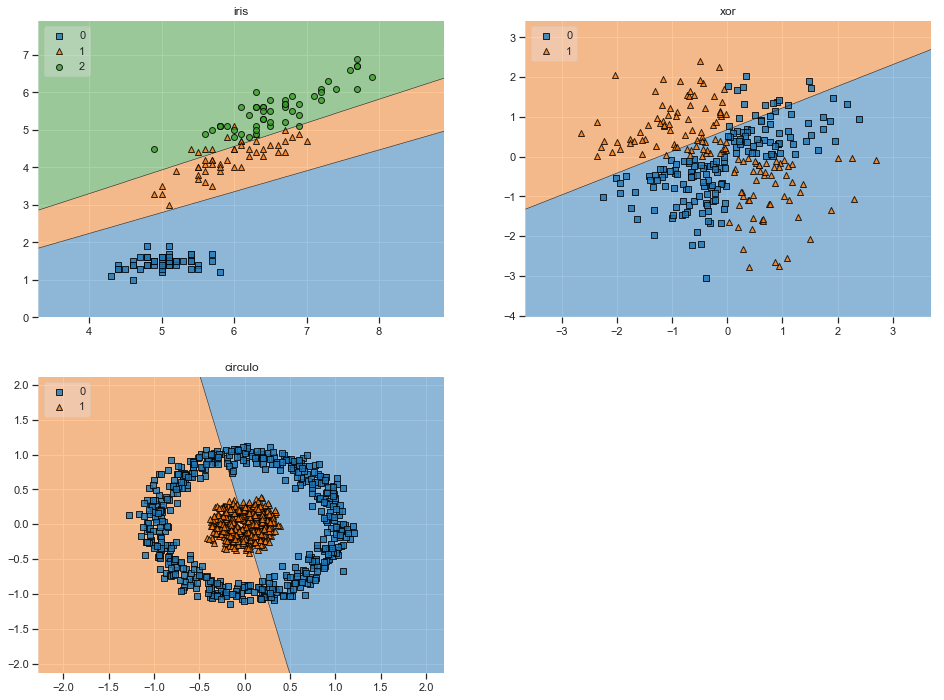

In [14]:
from sklearn.linear_model import LogisticRegression

gs = gridspec.GridSpec(2, 2)

for tipo, grd  in zip(["iris", "xor", "circulo"], itertools.product([0, 1], repeat=2)):
    clf = LogisticRegression()
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    plt.title(tipo)

# KNN

### Tareas: regresión y clasificación

### Modelo: no hay, basado en memoria

### Parámetros: cantidad de vecinos / radio del vecindario


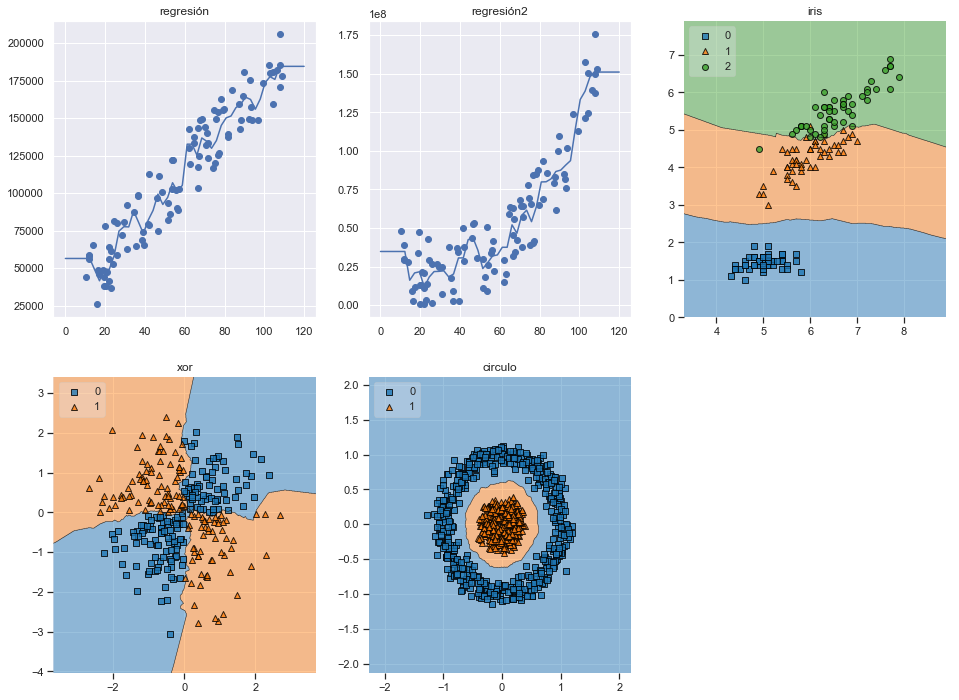

In [15]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

gs = gridspec.GridSpec(2, 3)

for (tipo, clfClass), grd  in zip([("regresión", KNeighborsRegressor),
                                   ("regresión2", KNeighborsRegressor),
                                   ("iris", KNeighborsClassifier),
                                   ("xor", KNeighborsClassifier),
                                   ("circulo", KNeighborsClassifier)], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass()
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)

# Naive Bayes

### Tarea: sólo clasficación

### Modelo: Busca encontrar la probabilidad de la variable explicada condicionada a las variables explicativas, para ello parte del teorema de bayes

## $$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                 {P(x_1, \dots, x_n)}$$
                                 
### La parte "Naive" viene de asumir muy "inocentemente" que todas las variables explicativas son independientes entre si, ergo:

## $$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)$$

## $$P(x_1, \dots x_n \mid y) = \prod_{i=1}^{n} P(x_i \mid y)$$

## $$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                 {P(x_1, \dots, x_n)}$$

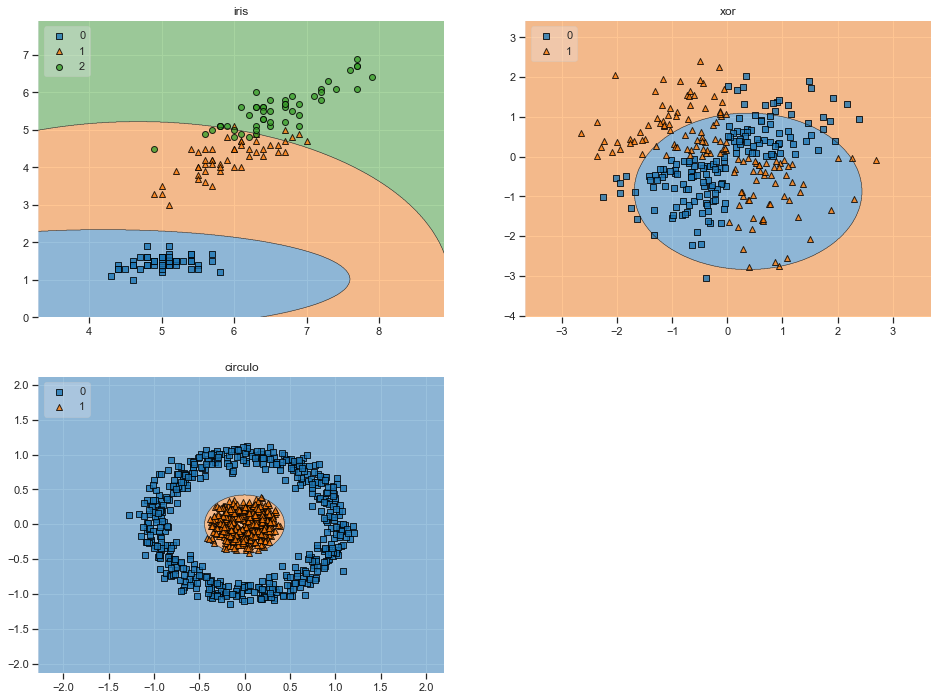

In [16]:
from sklearn.naive_bayes import GaussianNB

gs = gridspec.GridSpec(2, 2)

for tipo, grd  in zip(["iris", "xor", "circulo"], itertools.product([0, 1], repeat=2)):
    clf = GaussianNB()
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    plt.title(tipo)

## Support Vector Machines

### Tareas: regresión y clasificación

### Busca maximizar los margenes entre clases, cuando no es posible una separación lineal, se puede usar el "kernel trick"

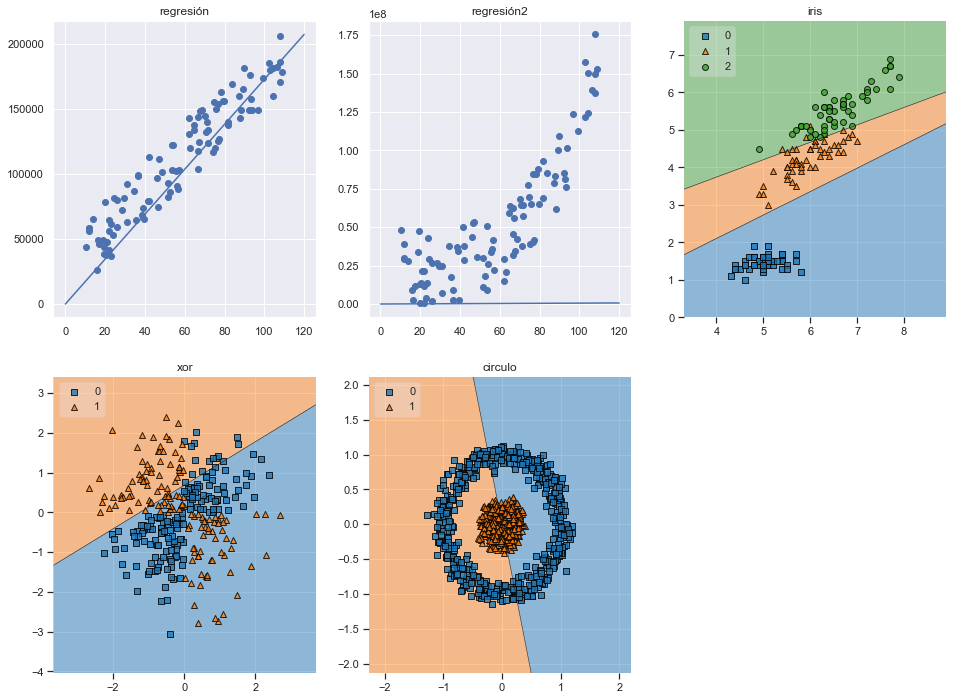

In [17]:
from sklearn.svm import LinearSVC, LinearSVR

gs = gridspec.GridSpec(2, 3)

for (tipo, clfClass), grd  in zip([("regresión", LinearSVR),
                                   ("regresión2", LinearSVR),
                                   ("iris", LinearSVC),
                                   ("xor", LinearSVC),
                                   ("circulo", LinearSVC)], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass()
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)

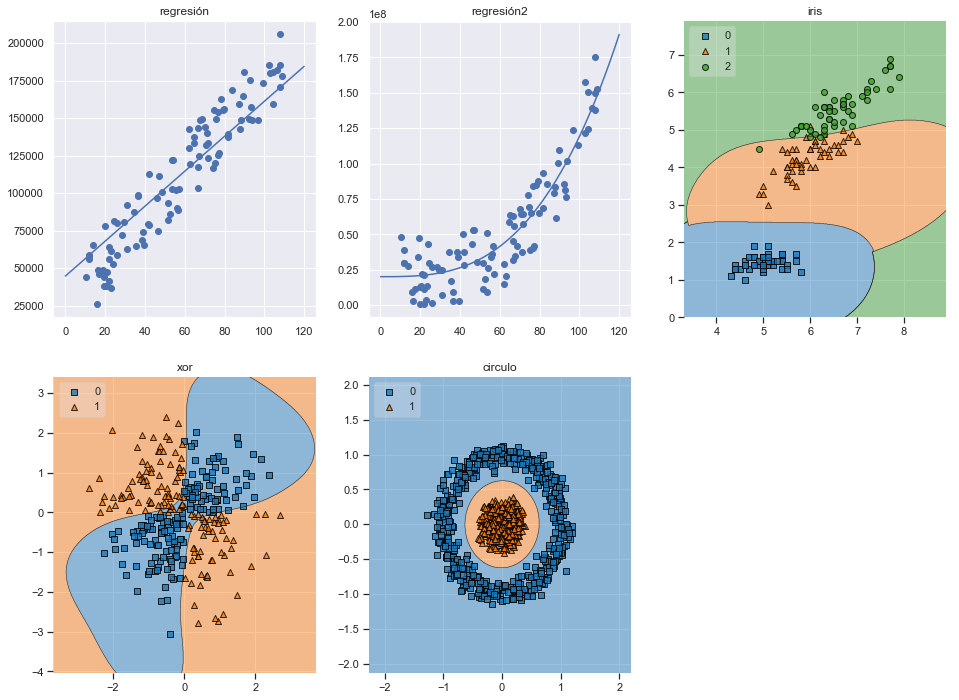

In [18]:
from sklearn.svm import SVC, SVR

gs = gridspec.GridSpec(2, 3)

for (tipo, clfClass, params), grd  in zip([("regresión", SVR, {"kernel": "linear"}),
                                   ("regresión2", SVR, {"kernel": "poly"}),
                                   ("iris", SVC, {}),
                                   ("xor", SVC, {}),
                                   ("circulo", SVC, {})], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass(**params)
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)

# Árboles de decision

### Tareas: regresión y clasificación

### Son metodos de inducción no paramétricos (no hay modelo tipo ecuación). Se basan en la creación "greedy" de simples reglas de decisión que permitan modelar el problema.

![alt text](arbol.png "Title")

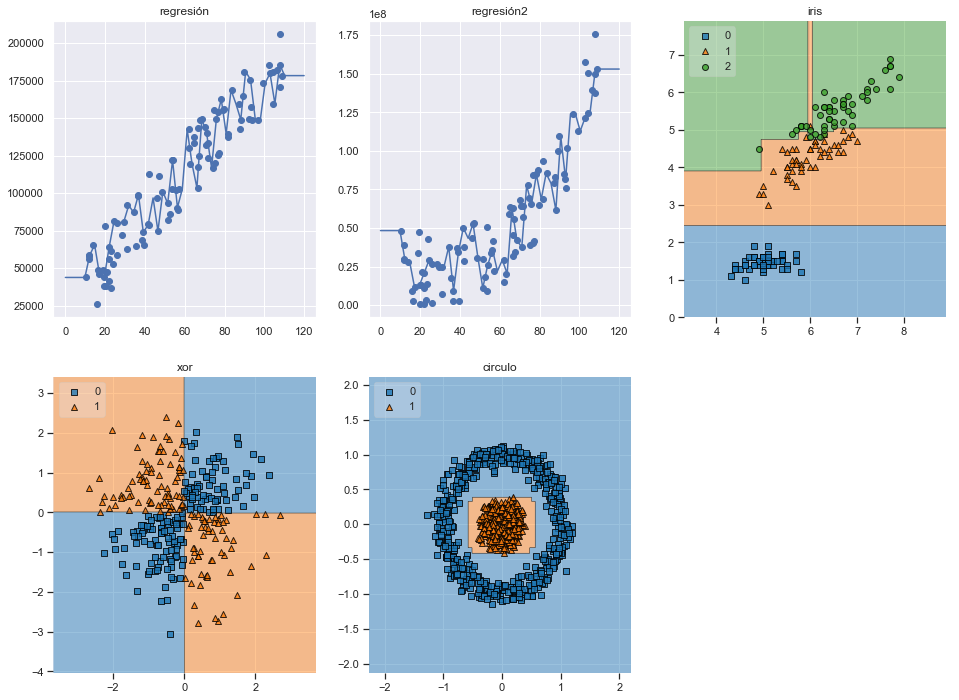

In [19]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

gs = gridspec.GridSpec(2, 3)

for (tipo, clfClass), grd  in zip([("regresión", DecisionTreeRegressor),
                                   ("regresión2", DecisionTreeRegressor),
                                   ("iris", DecisionTreeClassifier),
                                   ("xor", DecisionTreeClassifier),
                                   ("circulo", DecisionTreeClassifier)], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass()
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)

# Ensamble 1: Random Forest

### Tareas: regresión y clasificación

### Consiste en promediar una serie de algortimos base (arboles, sino se llama bagging), entreganos en un sub-set de casos y variables. Busca disminuir la varianza de la estimación

![alt text](forest.png "Title")

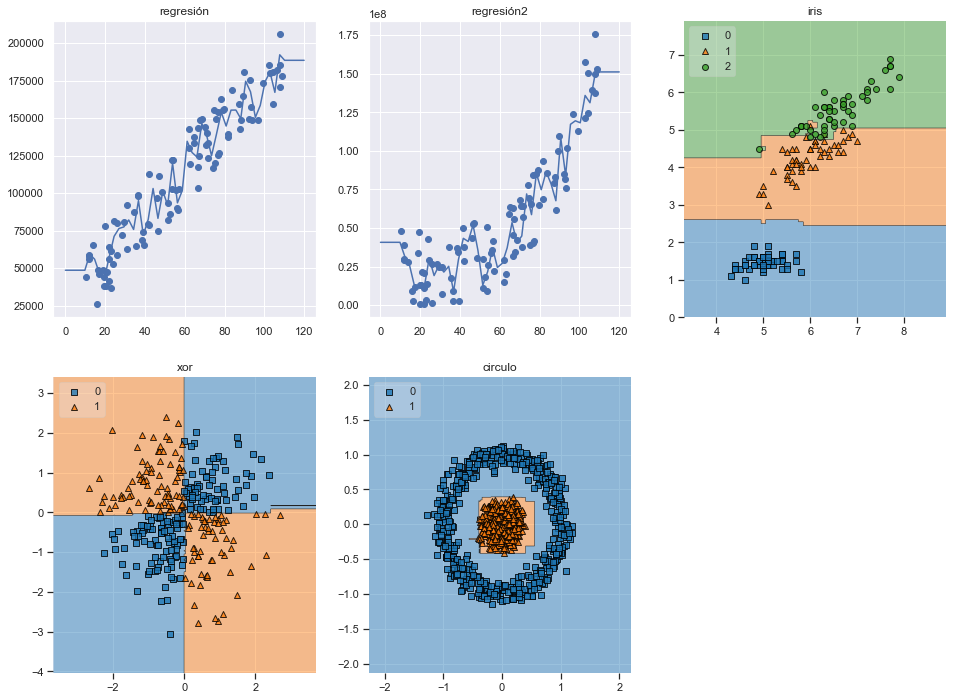

In [20]:
from sklearn.ensemble  import RandomForestClassifier, RandomForestRegressor

gs = gridspec.GridSpec(2, 3)

for (tipo, clfClass), grd  in zip([("regresión", RandomForestRegressor),
                                   ("regresión2", RandomForestRegressor),
                                   ("iris", RandomForestClassifier),
                                   ("xor", RandomForestClassifier),
                                   ("circulo", RandomForestClassifier)], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass()
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)

# Ensamble 1: Boosting (Adaboosting & GraientBoosting)

### Tareas: regresión y clasificación

### Son metodos que también agregan clasificadores base, pero en lugar de promediarlos, van ajustando los pesos de los posteriores, basados en los erroes de los anteriores

![alt text](adaboost.jpeg "Title")

C:\Users\rcrescenzi\Documents\utils\python\current\python-3.6.6.amd64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rcrescenzi\Documents\utils\python\current\python-3.6.6.amd64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rcrescenzi\Documents\utils\python\current\python-3.6.6.amd64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


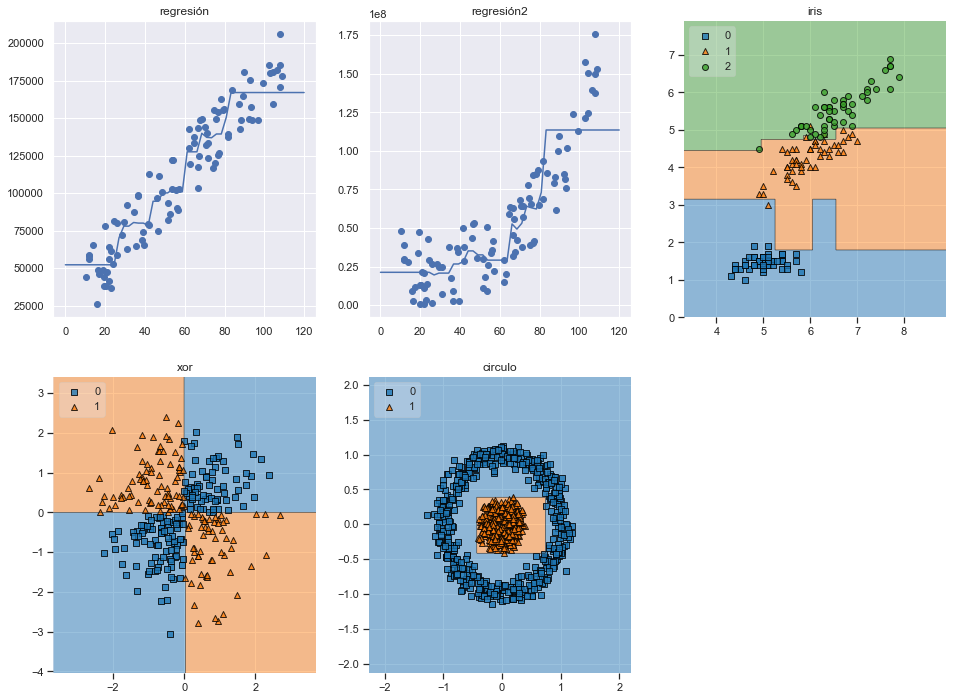

In [21]:
from lightgbm import LGBMClassifier, LGBMRegressor

gs = gridspec.GridSpec(2, 3)

for (tipo, clfClass), grd  in zip([("regresión", LGBMRegressor),
                                   ("regresión2", LGBMRegressor),
                                   ("iris", LGBMClassifier),
                                   ("xor", LGBMClassifier),
                                   ("circulo", LGBMClassifier)], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass()
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)

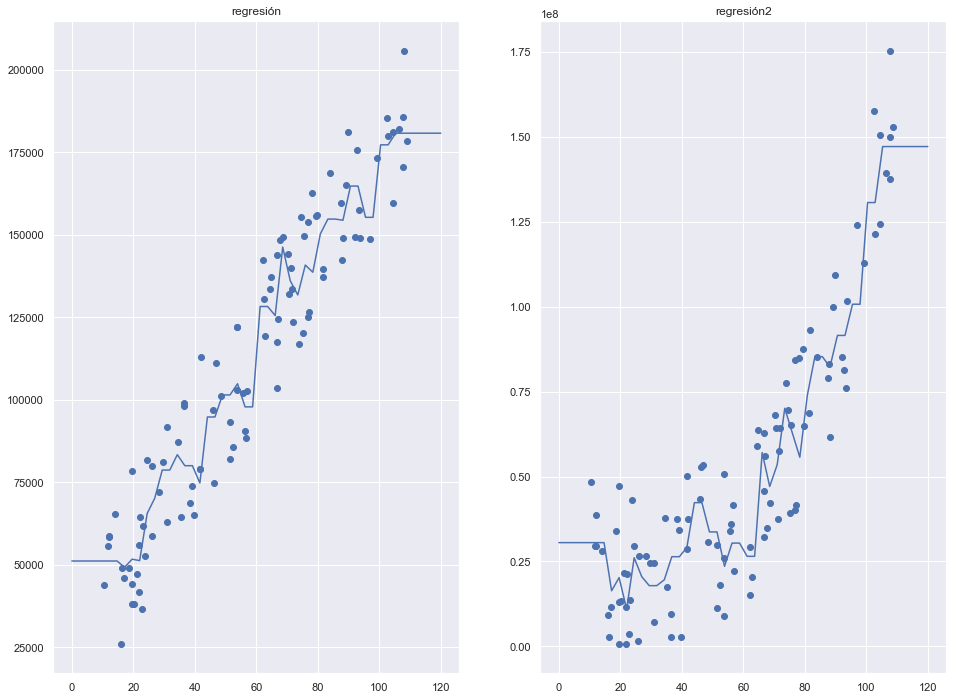

In [24]:
from lightgbm import LGBMClassifier, LGBMRegressor

gs = gridspec.GridSpec(1, 2)

for (tipo, clfClass), grd  in zip([("regresión", LGBMRegressor),
                                   ("regresión2", LGBMRegressor)
                                   ], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass(min_child_samples=5)
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)

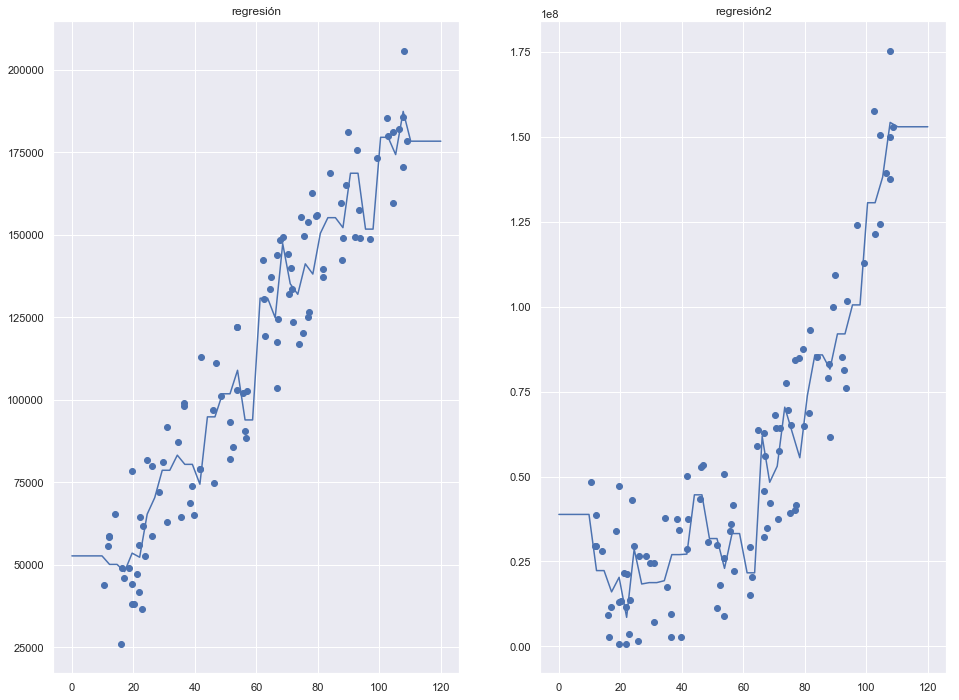

In [25]:
from lightgbm import LGBMClassifier, LGBMRegressor

gs = gridspec.GridSpec(1, 2)

for (tipo, clfClass), grd  in zip([("regresión", LGBMRegressor),
                                   ("regresión2", LGBMRegressor)
                                   ], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass(min_child_samples=1)
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)